In [3]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm


import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Vanishing Gradient, Data Generation

In [17]:
backend = Aer.get_backend('qasm_simulator')

np.random.seed(42)
x = np.random.uniform(0, np.pi, (20, 10))
n = 20
d = 8

## Quantum Neural Network

In [18]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(q_bits=d*[5],
                             dim=d*[5] + [1],
                             reps=1,
                             backend = backend,
                             shots = 100000)
    
    network.backward(x[:,:5], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in  network.weight_gradient_list]) 

  0%|          | 0/20 [00:00<?, ?it/s]

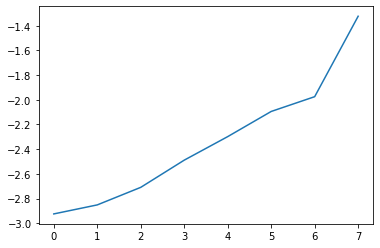

In [22]:
grad_total_mean = np.mean(grad_average, axis=0)
grad_std = np.std(grad_average, axis=0)

#plt.errorbar(list(range(d)), grad_total_mean, yerr=grad_std, fmt='.k')
plt.plot(list(range(d)), np.log10(grad_total_mean))

In [20]:
saver(grad_average, data_path("grad_average"))

In [25]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(q_bits=d*[10],
                             dim=d*[10] + [1],
                             reps=1,
                             backend = backend,
                             shots = 100000)
    
    network.backward(x[:,:10], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in  network.weight_gradient_list])
    
saver(grad_average, data_path("grad_average3"))

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

<ErrorbarContainer object of 3 artists>

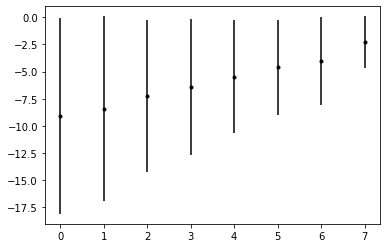

In [33]:
grad_total_mean = np.mean(grad_average[:10], axis=0)
grad_std = np.std(grad_average[:10], axis=0)

#plt.errorbar(list(range(d)), np.log10(grad_total_mean), yerr=np.log10(grad_std), fmt='.k')
plt.plot(list(range(d)), np.log10(grad_total_mean))

## Classical Neural Network